IMPORTED ALL REQUIRED LIBRARIES

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

LETS CREATE A DATA FRAME USING PANDAS AND IMPORT THE CSV FILE

In [3]:
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


EDA

In [4]:
df.head()  # top 5 rows of dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.tail()    # down 5 rows of dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
df.shape   # shape of the dataset

(30, 17)

In [7]:
df.columns  # columns present in the dataset

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
df.dtypes  # data types present in dataset

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [9]:
df.info()  #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


SUMMARY STATISTICS

In [11]:
df.describe() # here we can see statistically described data
# here 75th quartile is more than mean

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
df.isnull().sum() # lets check whether there are any missing values present in the dataset
# we can see that there are no missing values in the dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

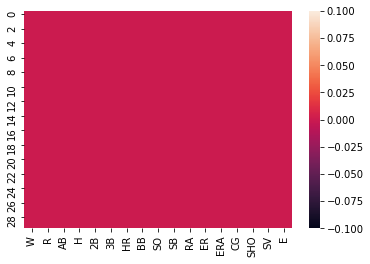

In [13]:
sns.heatmap(df.isnull())   #checking null values graphically

<AxesSubplot:>

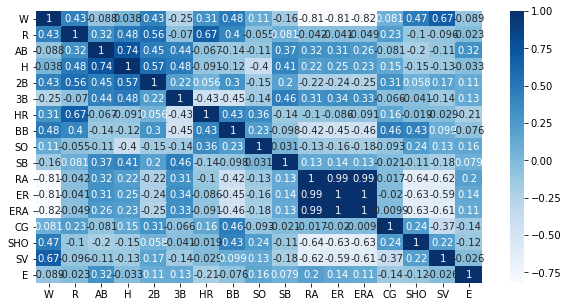

In [14]:
#lets check the correlation matrix by default method is pearson

fig=plt.figure(figsize=(10,5))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")
#from the below correlation matrix we see there is strong negative correlation between class and variance of image

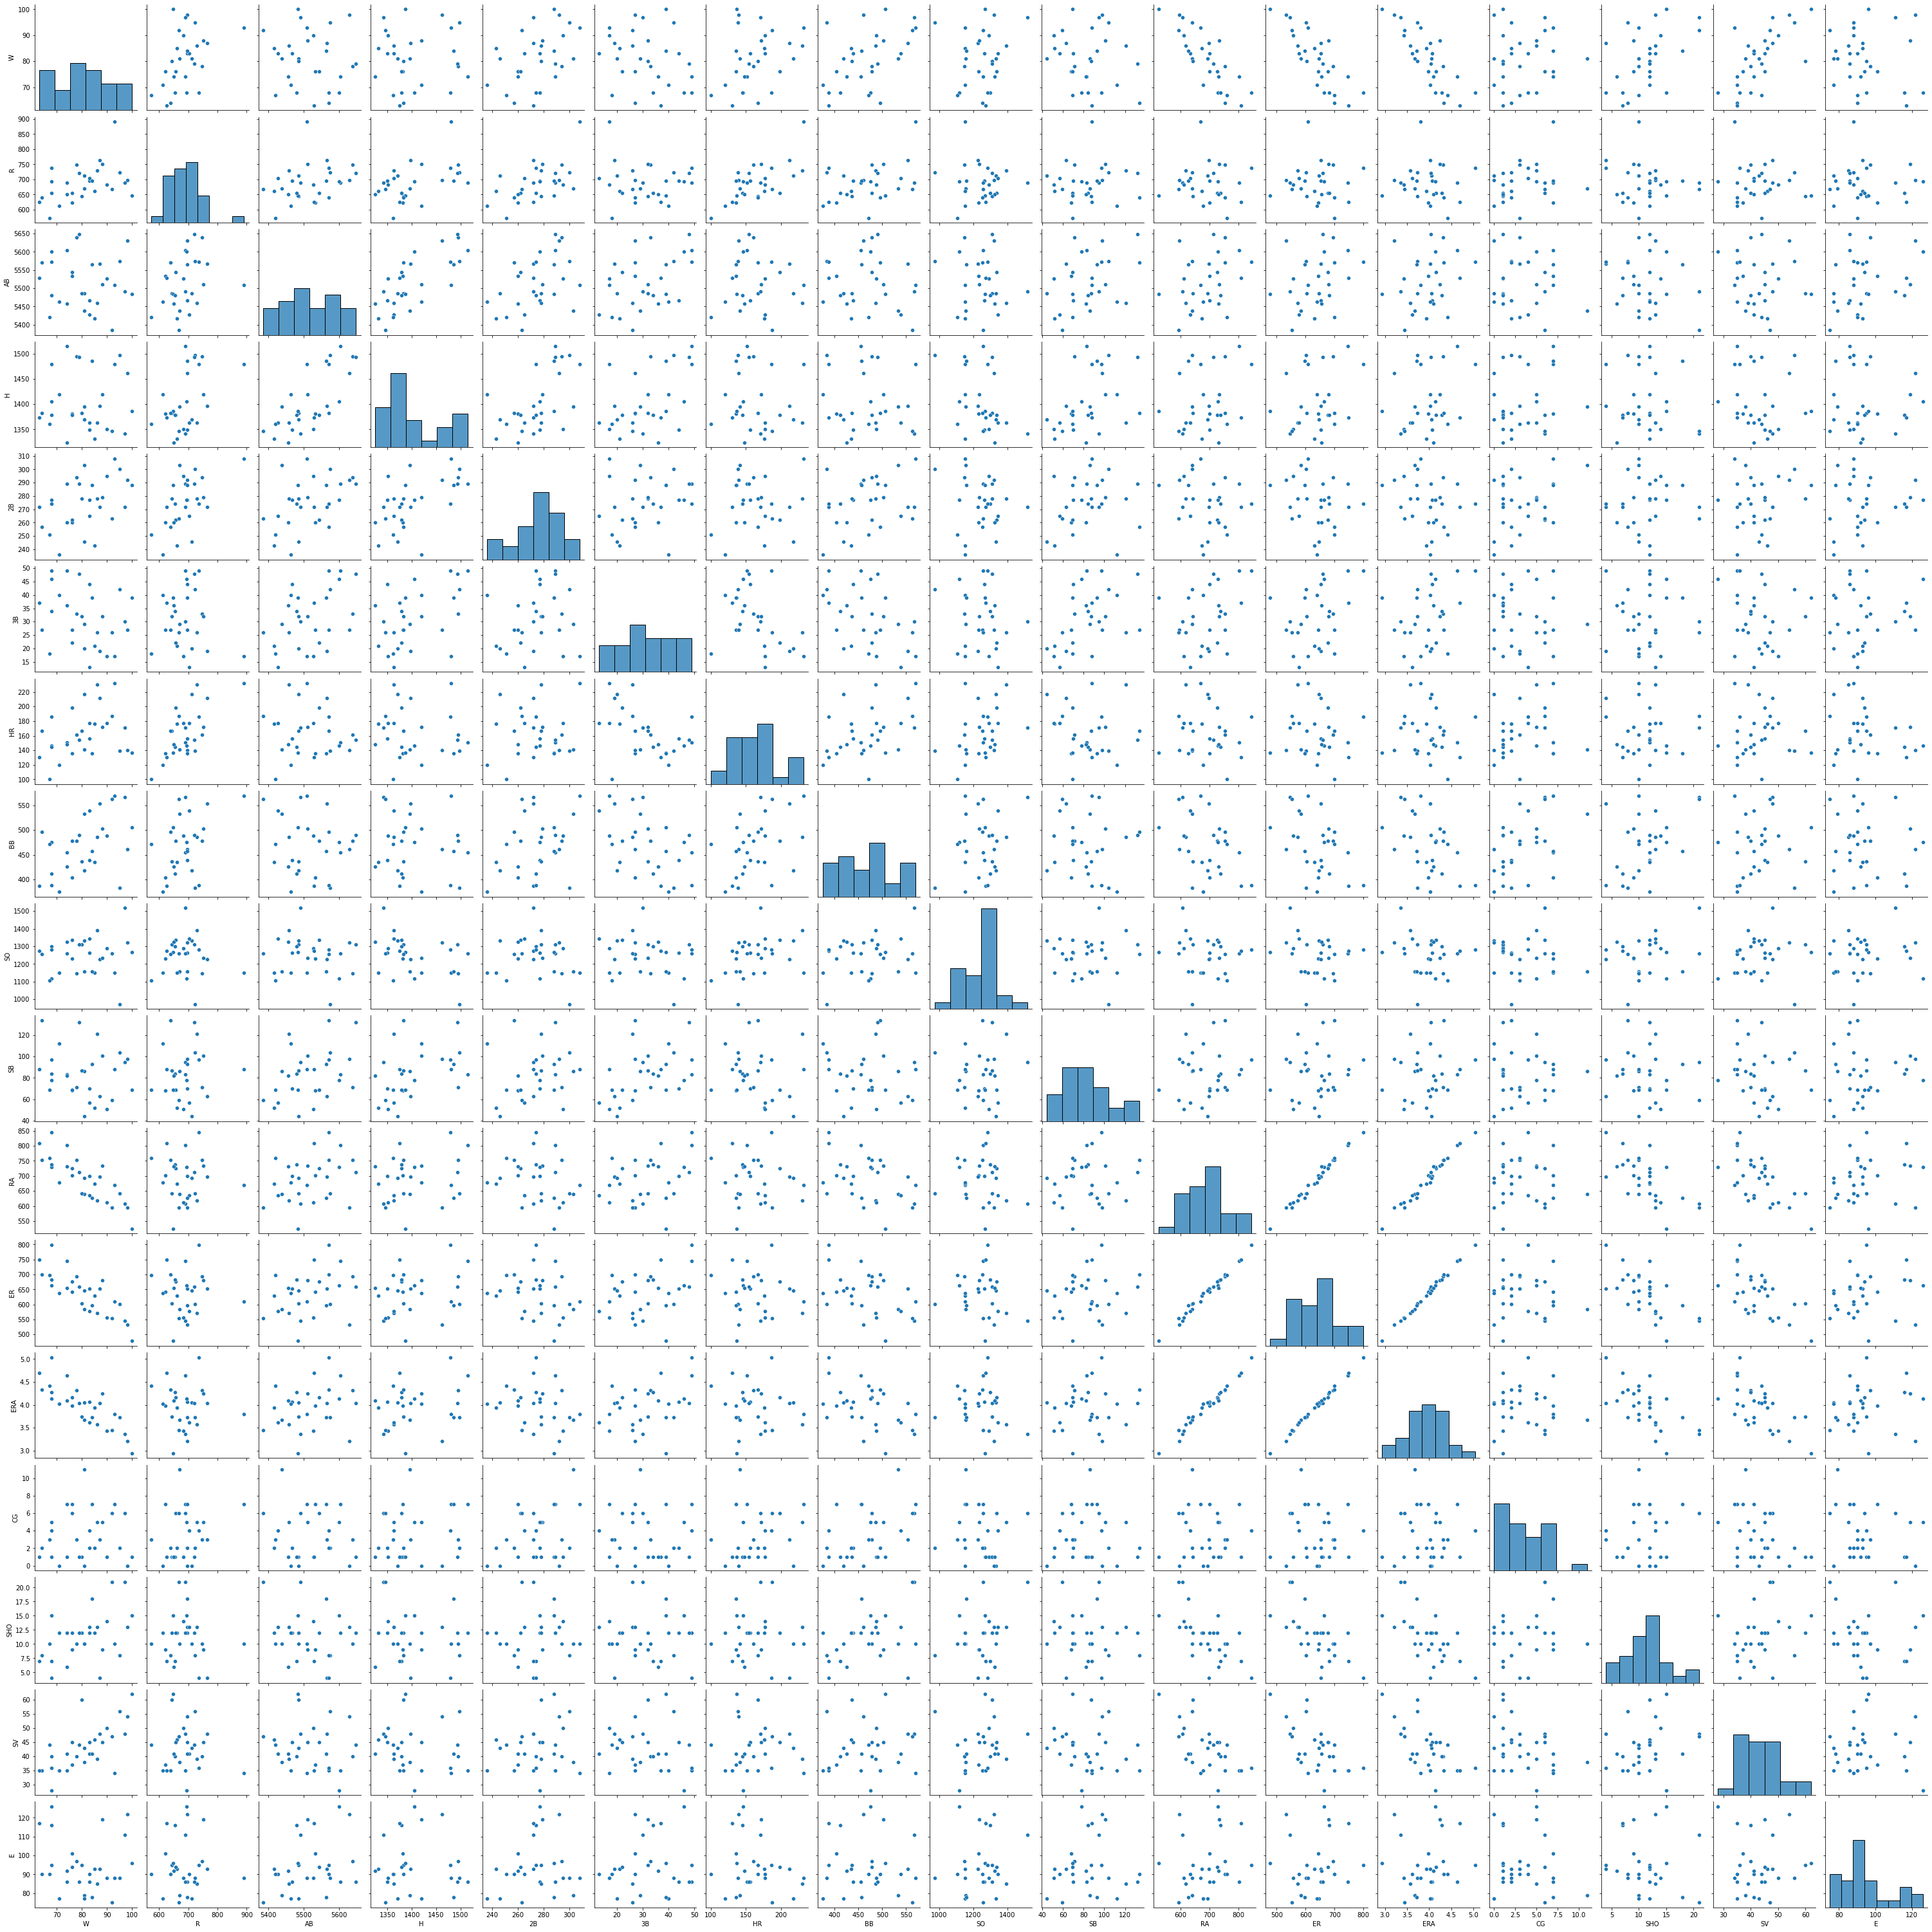

In [15]:
sns.pairplot(df)

In [16]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

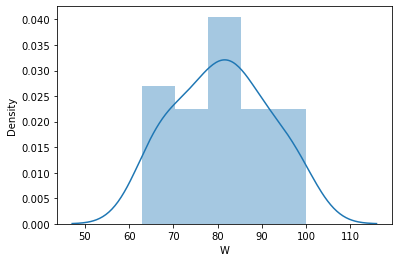

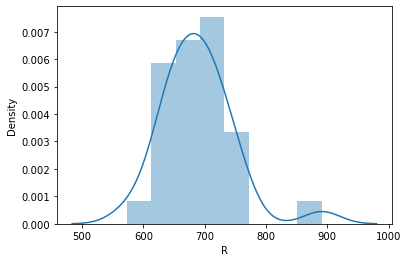

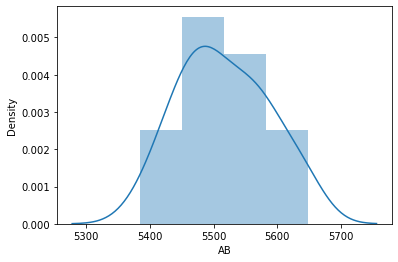

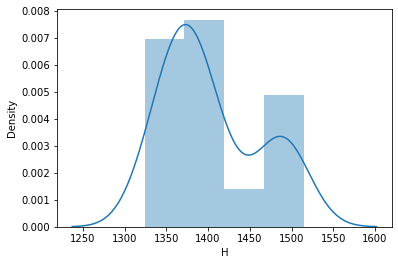

In [17]:
columns=['W', 'R', 'AB', 'H']
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

W         AxesSubplot(0.125,0.816017;0.065678x0.0639831)
R      AxesSubplot(0.203814,0.816017;0.065678x0.0639831)
AB     AxesSubplot(0.282627,0.816017;0.065678x0.0639831)
H      AxesSubplot(0.361441,0.816017;0.065678x0.0639831)
2B     AxesSubplot(0.440254,0.816017;0.065678x0.0639831)
3B     AxesSubplot(0.519068,0.816017;0.065678x0.0639831)
HR     AxesSubplot(0.597881,0.816017;0.065678x0.0639831)
BB     AxesSubplot(0.676695,0.816017;0.065678x0.0639831)
SO     AxesSubplot(0.755508,0.816017;0.065678x0.0639831)
SB     AxesSubplot(0.834322,0.816017;0.065678x0.0639831)
RA        AxesSubplot(0.125,0.739237;0.065678x0.0639831)
ER     AxesSubplot(0.203814,0.739237;0.065678x0.0639831)
ERA    AxesSubplot(0.282627,0.739237;0.065678x0.0639831)
CG     AxesSubplot(0.361441,0.739237;0.065678x0.0639831)
SHO    AxesSubplot(0.440254,0.739237;0.065678x0.0639831)
SV     AxesSubplot(0.519068,0.739237;0.065678x0.0639831)
E      AxesSubplot(0.597881,0.739237;0.065678x0.0639831)
dtype: object

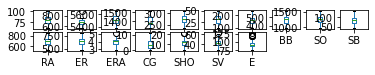

In [23]:
df.plot(kind='box',subplots=True,layout=(10,10))

In [25]:
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [28]:
zscr[5][1]

3.5096470447193067

In [30]:
#lets check the presence of outlier
print("shape before removing the outliers: ",df.shape)

dfnew=df[(zscr<3).all(axis=1)]
print("shape before removing the outliers: ",dfnew.shape)

shape before removing the outliers:  (30, 17)
shape before removing the outliers:  (29, 17)


In [34]:
# lets divide the new dataset into input and output datasets
x=df.drop(columns=['W'])
y=df[["W"]]

In [35]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [36]:
y

,W
0,95
1,83
2,81
3,76
4,74
5,93
6,87
7,81
8,80
9,78


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=22,random_state=70)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 16)
(22, 16)
(8, 1)
(22, 1)


In [41]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_train,y_train)

1.0

In [42]:
lm.coef_

array([[ 0.0445204 ,  0.02161153,  0.07947399,  0.14637156, -0.17297541,
         0.03812471, -0.00662675,  0.00291754, -0.08177274, -0.02298584,
        -0.00336898, -0.00029175, -0.00482601, -0.02304861,  0.13280701,
        -0.2872198 ]])

In [43]:
lm.intercept_

array([-175.63986869])

In [44]:
# predicting the value
pred=lm.predict(x_test)
print("predicted result",pred)
print("actual result",y_test)

predicted result [[ 83.33332986]
 [ 72.97618174]
 [ 79.85738513]
 [ 72.68993924]
 [ 75.95946478]
 [ 68.13848467]
 [ 83.79814009]
 [ 70.7287289 ]
 [105.60138564]
 [ 89.13994442]
 [ 93.76240147]
 [ 72.48894759]
 [ 85.8106569 ]
 [ 90.39093883]
 [ 85.46982882]
 [ 88.68845806]
 [ 77.34095335]
 [ 82.29467942]
 [ 80.43272267]
 [ 87.11559146]
 [ 93.223734  ]
 [ 82.38478284]]
actual result       W
11   86
12   85
13   76
3    76
10   88
28   74
15  100
19   64
5    93
27   79
9    78
17   97
16   98
6    87
2    81
4    74
1    83
25   92
8    80
7    81
26   84
29   68


In [45]:
print("error")

print('Mean absolute error:',mean_absolute_error(y_test,pred))

print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 9.362051116711855
Mean squared error: 119.41360360397444
Root mean squared error 10.92765316085638


In [52]:
standardScale = StandardScaler()
standardScale.fit_transform(x)

selectkBest = SelectKBest()
x_new = selectkBest.fit_transform(x, y)

X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [55]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 4547.286008, 2793.203790
Ridge    : 4039.493734, 1952.424648
svm    : 11901.685700, 5518.258601
GNB    : 5320.806500, 3133.886941
RF    : 8355.728442, 5195.557966
GB    : 5313.625000, 2407.922102


Hyperparameter tunning using GrideSearchCV

In [60]:
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

({'alpha': 0.01, 'solver': 'sag'}, 0.18628903581579775)